#  K-Means Clustering


Реализовать K-Means на наборе данных пингвинов.

1. Примените K-Means к набору данных `пингвины`.
2. Постройте набор данных с метками кластеров. Похожи ли они на основную картину, полученную при графическом анализе?
3. Рассчитайте однородность, полноту и оценку v_measure. Насколько близко сходится кластеризация?

Используйте следующие числовые атрибуты:
```
bill_length_mm
bill_depth_mm
flipper_length_mm
body_mass_g
```

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


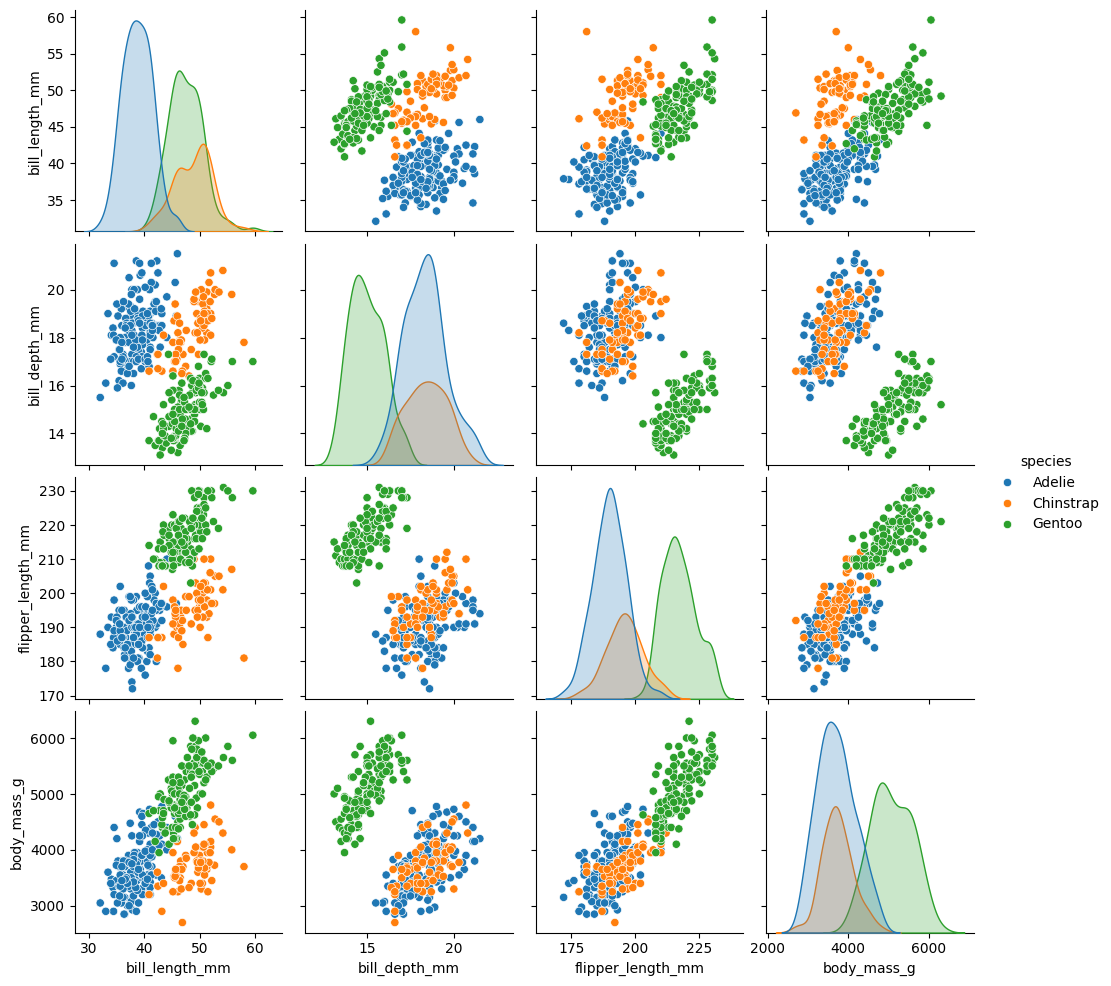

In [1]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt


penguins = sns.load_dataset("penguins")

sns.pairplot(data=penguins, hue="species")
penguins = penguins.dropna()
penguins.head()

# Анализ данных

In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [3]:
str(penguins)

'    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \\\n0    Adelie  Torgersen            39.1           18.7              181.0   \n1    Adelie  Torgersen            39.5           17.4              186.0   \n2    Adelie  Torgersen            40.3           18.0              195.0   \n4    Adelie  Torgersen            36.7           19.3              193.0   \n5    Adelie  Torgersen            39.3           20.6              190.0   \n..      ...        ...             ...            ...                ...   \n338  Gentoo     Biscoe            47.2           13.7              214.0   \n340  Gentoo     Biscoe            46.8           14.3              215.0   \n341  Gentoo     Biscoe            50.4           15.7              222.0   \n342  Gentoo     Biscoe            45.2           14.8              212.0   \n343  Gentoo     Biscoe            49.9           16.1              213.0   \n\n     body_mass_g     sex  \n0         3750.0    Male  \n1         3800.0

In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


**Перевод из float в int**

In [5]:
penguins['bill_length_mm'] = penguins['bill_length_mm'].astype(int)
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].astype(int)
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].astype(int)
penguins['body_mass_g'] = penguins['body_mass_g'].astype(int)

In [6]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            333 non-null    object
 1   island             333 non-null    object
 2   bill_length_mm     333 non-null    int64 
 3   bill_depth_mm      333 non-null    int64 
 4   flipper_length_mm  333 non-null    int64 
 5   body_mass_g        333 non-null    int64 
 6   sex                333 non-null    object
dtypes: int64(4), object(3)
memory usage: 20.8+ KB


In [7]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39,18,181,3750,Male
1,Adelie,Torgersen,39,17,186,3800,Female
2,Adelie,Torgersen,40,18,195,3250,Female
4,Adelie,Torgersen,36,19,193,3450,Female
5,Adelie,Torgersen,39,20,190,3650,Male


In [8]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.561562,16.735736,200.966967,4207.057057
std,5.478872,1.986964,14.015765,805.215802
min,32.000000,13.000000,172.000000,2700.000000
25%,39.000000,15.000000,190.000000,3550.000000
50%,44.000000,17.000000,197.000000,4050.000000
75%,48.000000,18.000000,213.000000,4775.000000
max,59.000000,21.000000,231.000000,6300.000000


**Проверим, нормально ли распределены данные bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g**

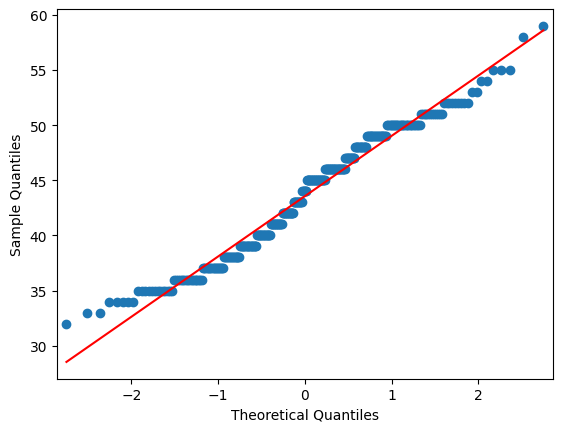

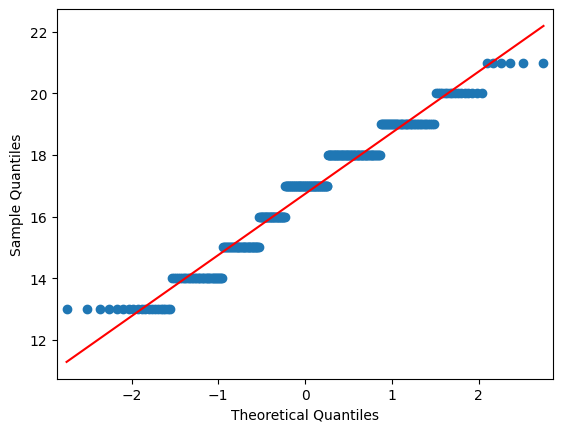

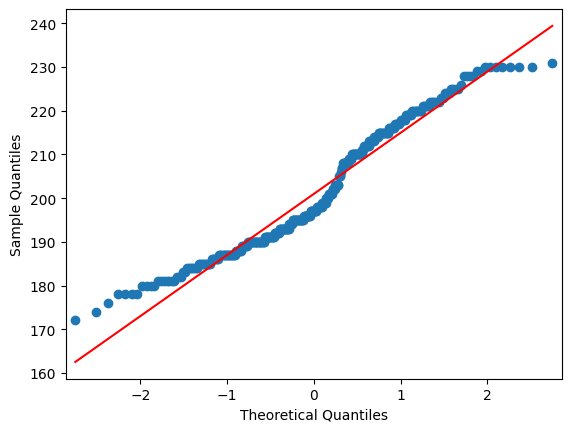

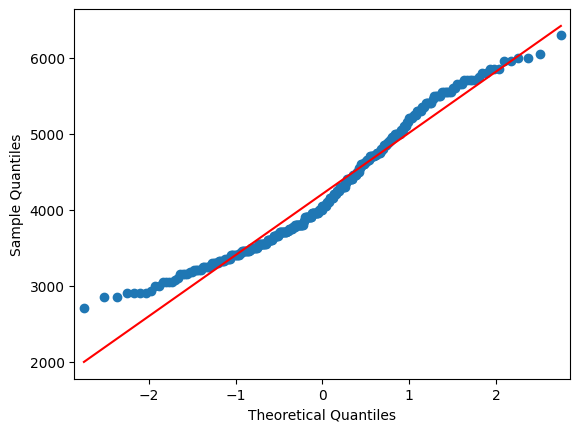

In [9]:
from statsmodels. graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(penguins["bill_length_mm"], line='s')
pyplot.show()
qqplot(penguins["bill_depth_mm"], line='s')
pyplot.show()
qqplot(penguins["flipper_length_mm"], line='s')
pyplot.show()
qqplot(penguins["body_mass_g"], line='s')
pyplot.show()

Есть незначительные выбросы по бокам, из чего можно сделать вывод, что представленные данные имеют нормальное распределение

# 1. K-Means

Сначала выберем числовые атрибуты

In [10]:
attributes = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[attributes]

Далее с помощью метода локтя определим примерное количество кластеров

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

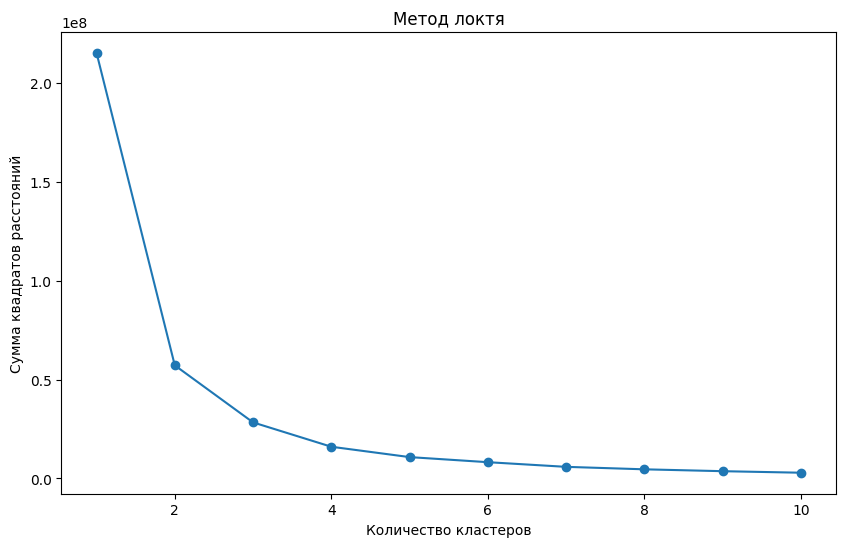

In [11]:
distortions = []

# Разное количество кластеров
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(X)
    distortions.append(model.inertia_)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

Как можно увидеть на графике, рекомендованное число кластеров - 3

Проведем анализ силуэта

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import numpy as np

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The silhouette_score is : 0.6307101634088479


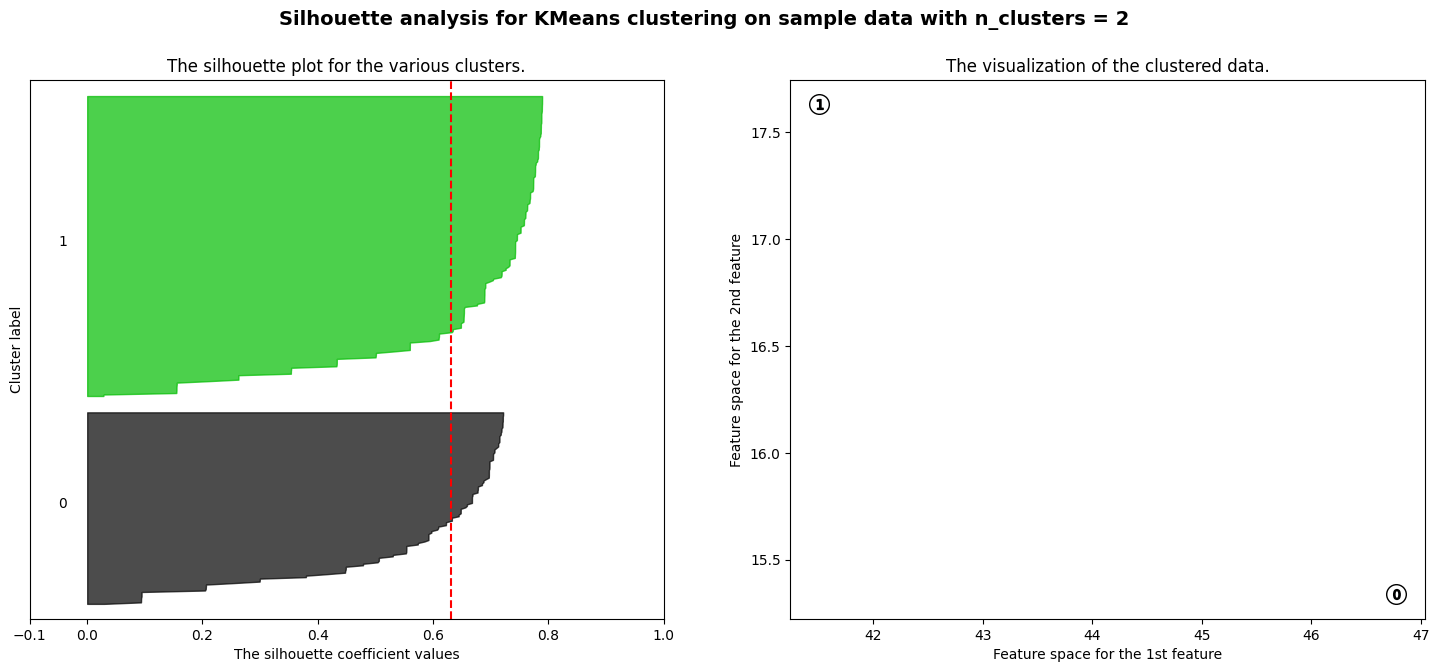

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The silhouette_score is : 0.5751824151308107


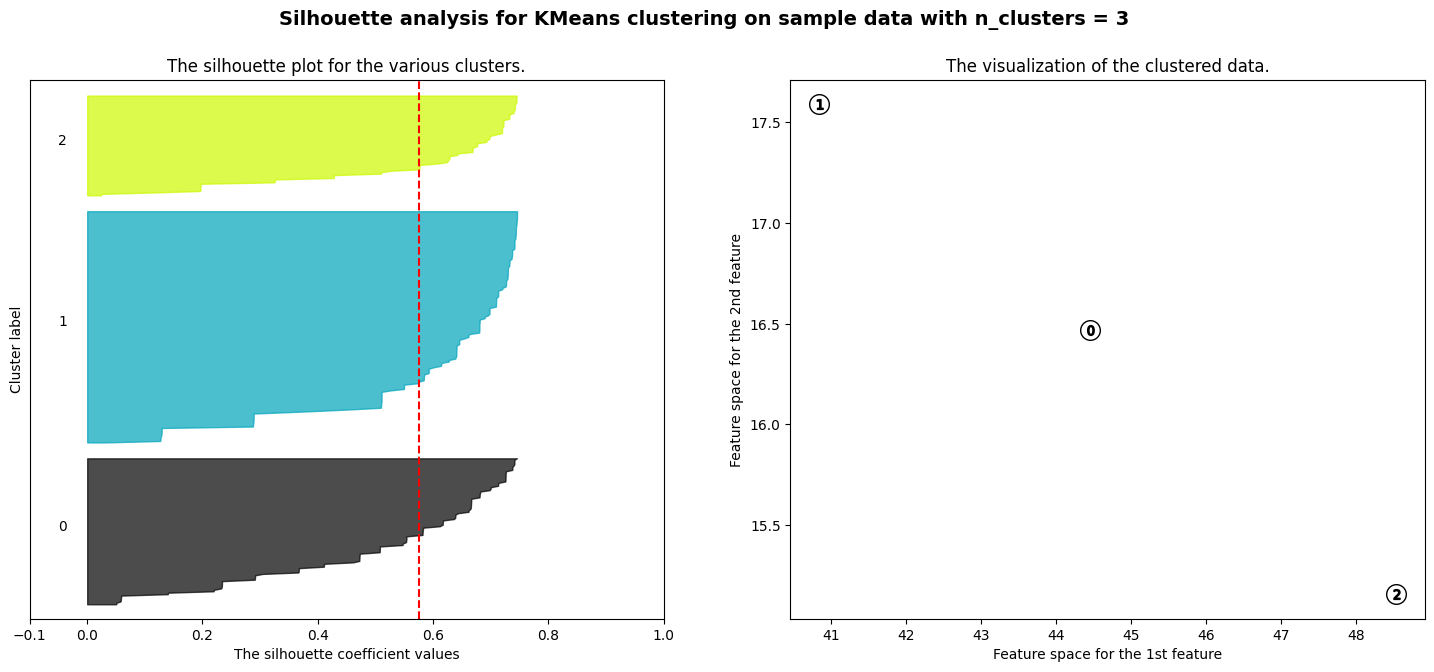

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The silhouette_score is : 0.5526767263300518


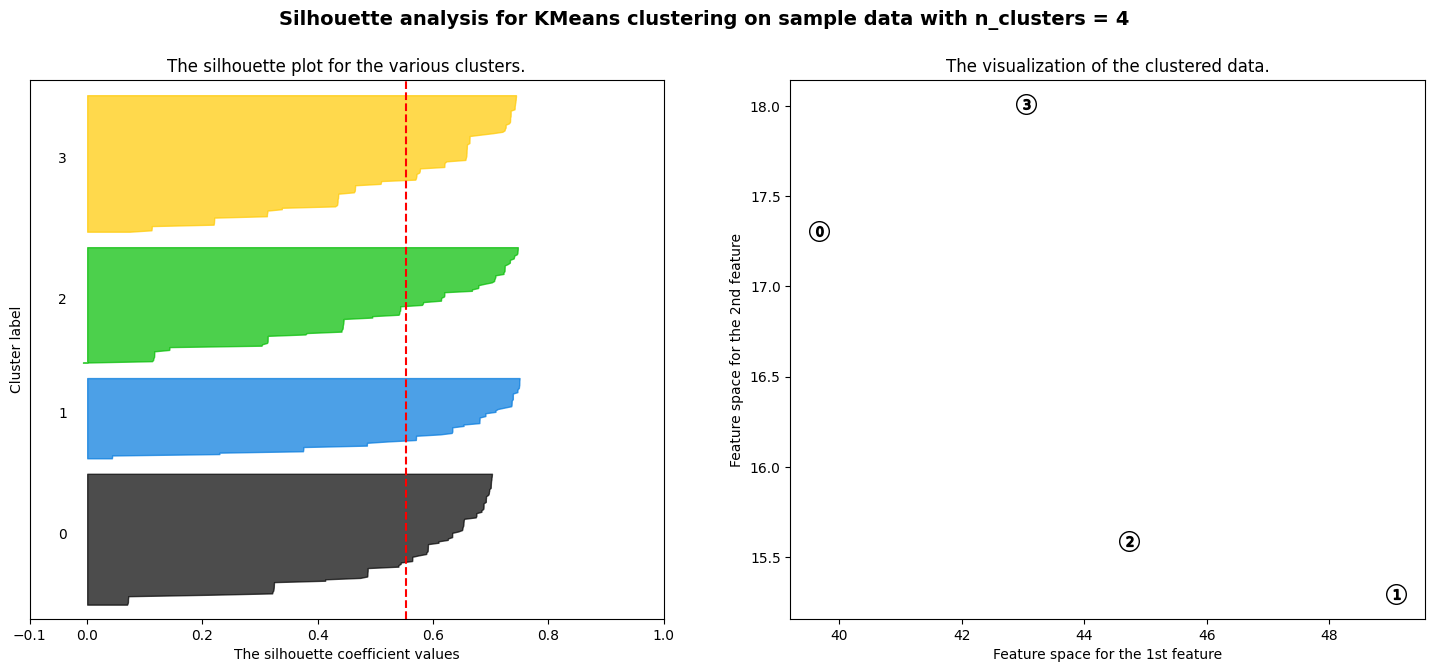

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The silhouette_score is : 0.5360832305865176


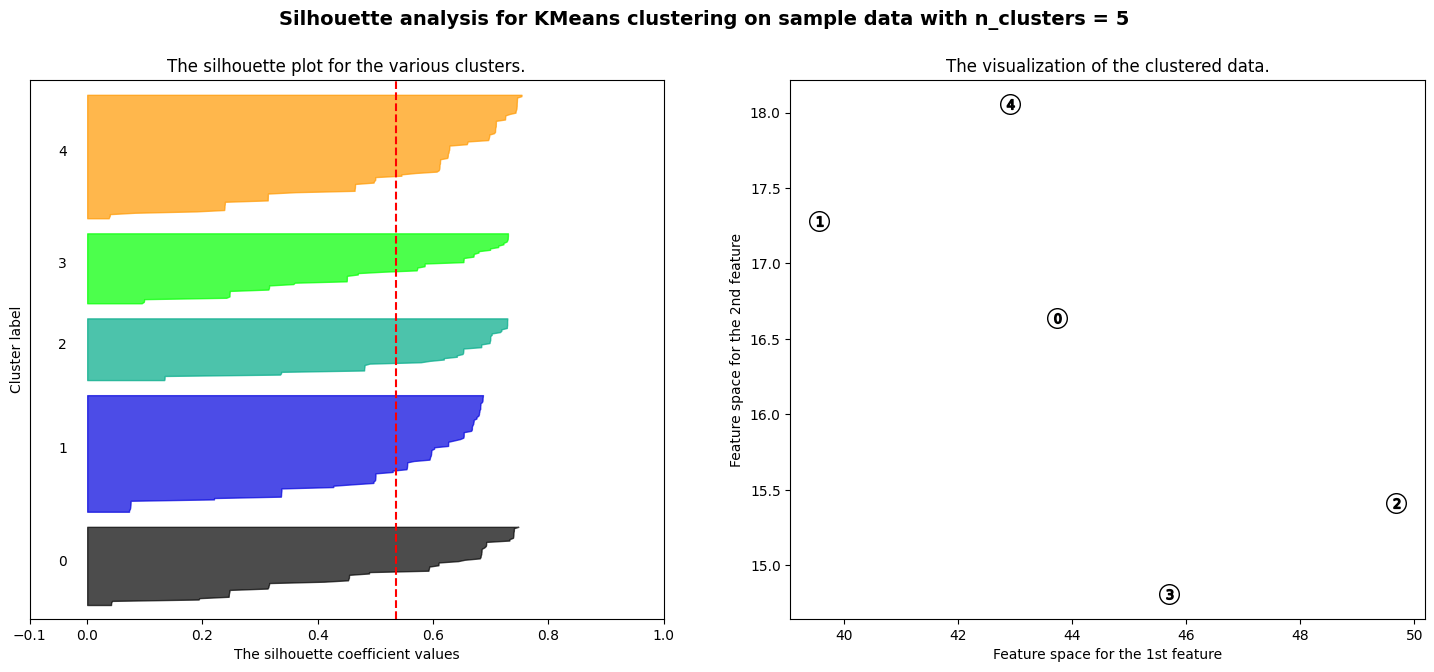

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The silhouette_score is : 0.5196509514586629


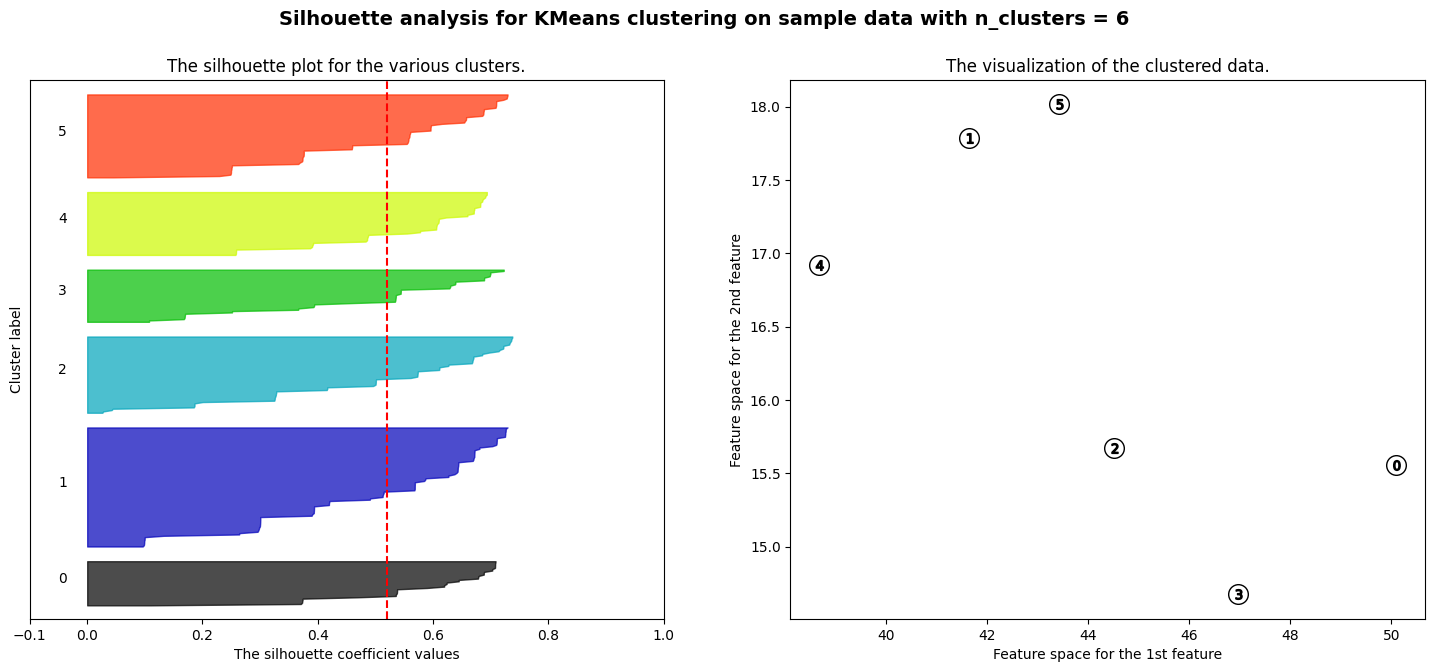

In [13]:
range_n_clusters = [2, 3, 4, 5, 6]


for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    centers = clusterer.cluster_centers_

    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

3 кластера самое оптимальное

Затем применим K-Means

In [14]:
model = KMeans(n_clusters=3)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Далее предскажем кластеры

In [15]:
predictions = model.predict(X)

И теперь добавим кластеры в датафрейм данных

In [34]:
penguins['cluster'] = predictions
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39             18                181   
1    Adelie  Torgersen              39             17                186   
2    Adelie  Torgersen              40             18                195   
4    Adelie  Torgersen              36             19                193   
5    Adelie  Torgersen              39             20                190   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe              47             13                214   
340  Gentoo     Biscoe              46             14                215   
341  Gentoo     Biscoe              50             15                222   
342  Gentoo     Biscoe              45             14                212   
343  Gentoo     Biscoe              49             16                213   

     body_mass_g     sex  cluster  
0           3750    Male        1  
1           380

**Теперь проведем k-means по парам столбцов**

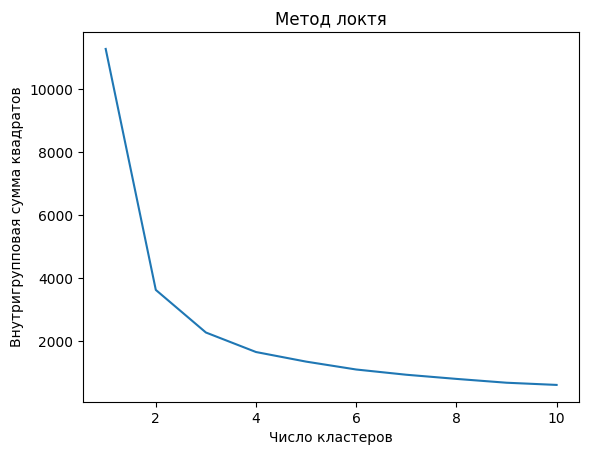

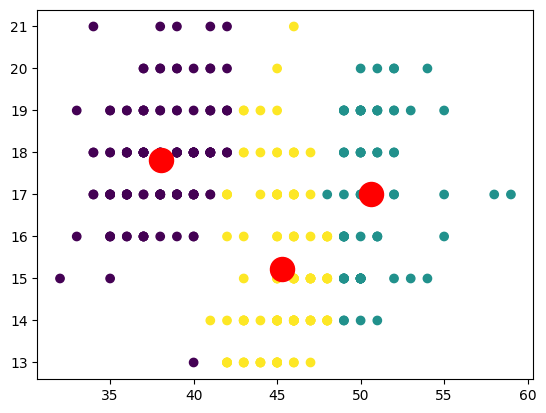

In [30]:
X1 = penguins[['bill_length_mm', 'bill_depth_mm']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('Внутригрупповая сумма квадратов')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X1)

y1 = KMeans(n_clusters=3, n_init=10, init='random', max_iter=5).fit_predict(X1)
plt.scatter(X1['bill_length_mm'], X1['bill_depth_mm'], c=y1, marker="o")
kmeans = KMeans(n_clusters=3, n_init=10, init='random', max_iter=5)
kmeans.fit(X1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker="o")
plt.show()

In [35]:
model = KMeans(n_clusters=3)
model.fit(X1)
predictions = model.predict(X1)
penguins['cluster1'] = predictions
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39             18                181   
1    Adelie  Torgersen              39             17                186   
2    Adelie  Torgersen              40             18                195   
4    Adelie  Torgersen              36             19                193   
5    Adelie  Torgersen              39             20                190   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe              47             13                214   
340  Gentoo     Biscoe              46             14                215   
341  Gentoo     Biscoe              50             15                222   
342  Gentoo     Biscoe              45             14                212   
343  Gentoo     Biscoe              49             16                213   

     body_mass_g     sex  cluster  cluster1  
0           3750    Male        1        

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


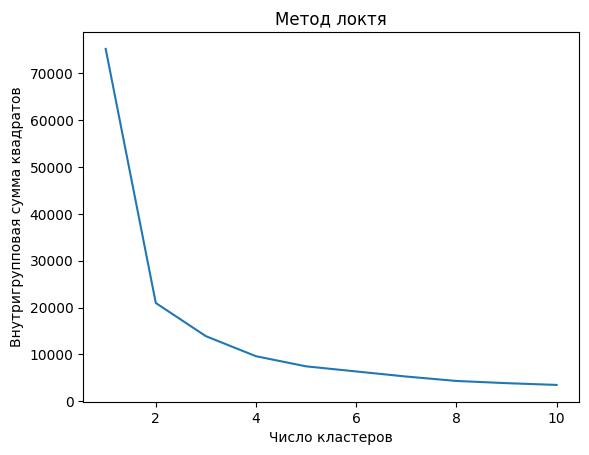

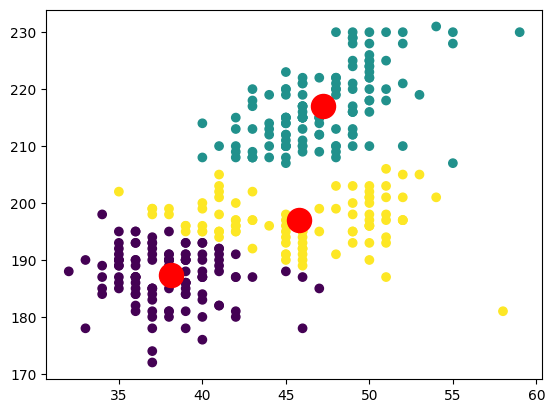

In [42]:
X2 = penguins[['bill_length_mm', 'flipper_length_mm']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('Внутригрупповая сумма квадратов')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X2)

y2 = KMeans(n_clusters=3, n_init=10, init='random', max_iter=5).fit_predict(X2)
plt.scatter(X2['bill_length_mm'], X2['flipper_length_mm'], c=y2, marker="o")
kmeans = KMeans(n_clusters=3, n_init=10, init='random', max_iter=5)
kmeans.fit(X2)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker="o")
plt.show()

In [36]:
model = KMeans(n_clusters=3)
model.fit(X2)
predictions = model.predict(X2)
penguins['cluster2'] = predictions
print(penguins)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39             18                181   
1    Adelie  Torgersen              39             17                186   
2    Adelie  Torgersen              40             18                195   
4    Adelie  Torgersen              36             19                193   
5    Adelie  Torgersen              39             20                190   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe              47             13                214   
340  Gentoo     Biscoe              46             14                215   
341  Gentoo     Biscoe              50             15                222   
342  Gentoo     Biscoe              45             14                212   
343  Gentoo     Biscoe              49             16                213   

     body_mass_g     sex  cluster  cluster1  cluster2  
0           3750    Male       

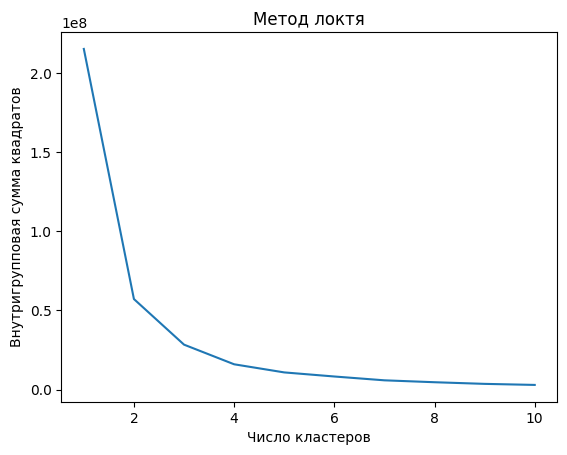

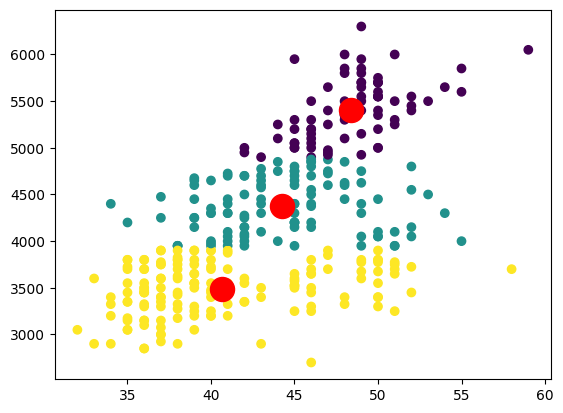

In [41]:
X3 = penguins[['bill_length_mm', 'body_mass_g']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('Внутригрупповая сумма квадратов')
plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X3)

y3 = KMeans(n_clusters=3, n_init=10, init='random', max_iter=5).fit_predict(X3)
plt.scatter(X3['bill_length_mm'], X3['body_mass_g'], c=y3, marker="o")
kmeans = KMeans(n_clusters=3, n_init=10, init='random', max_iter=5)
kmeans.fit(X3)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker="o")
plt.show()

In [37]:
model = KMeans(n_clusters=3)
model.fit(X3)
predictions = model.predict(X3)
penguins['cluster3'] = predictions
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39             18                181   
1    Adelie  Torgersen              39             17                186   
2    Adelie  Torgersen              40             18                195   
4    Adelie  Torgersen              36             19                193   
5    Adelie  Torgersen              39             20                190   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe              47             13                214   
340  Gentoo     Biscoe              46             14                215   
341  Gentoo     Biscoe              50             15                222   
342  Gentoo     Biscoe              45             14                212   
343  Gentoo     Biscoe              49             16                213   

     body_mass_g     sex  cluster  cluster1  cluster2  cluster3  
0           3750    M

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


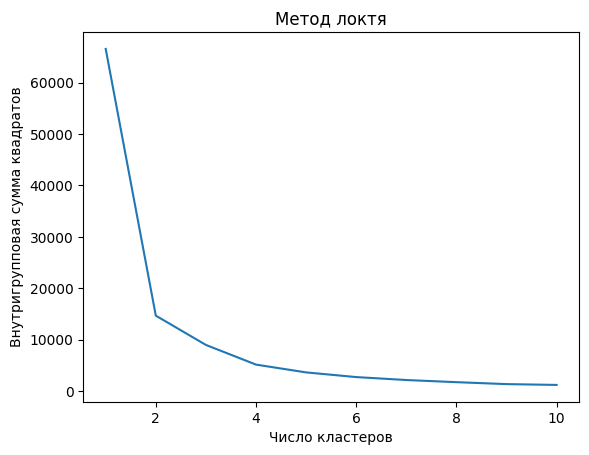

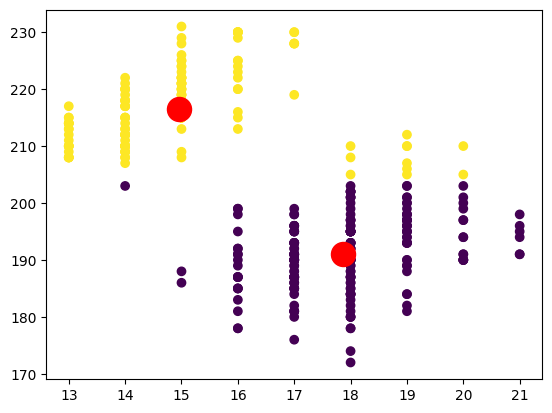

In [40]:
X4 = penguins[['bill_depth_mm', 'flipper_length_mm']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('Внутригрупповая сумма квадратов')
plt.show()

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X4)

y4 = KMeans(n_clusters=2, n_init=10, init='random', max_iter=5).fit_predict(X4)
plt.scatter(X4['bill_depth_mm'], X4['flipper_length_mm'], c=y4, marker="o")
kmeans = KMeans(n_clusters=2, n_init=10, init='random', max_iter=5)
kmeans.fit(X4)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker="o")
plt.show()

In [43]:
model = KMeans(n_clusters=2)
model.fit(X4)
predictions = model.predict(X4)
penguins['cluster4'] = predictions
print(penguins)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39             18                181   
1    Adelie  Torgersen              39             17                186   
2    Adelie  Torgersen              40             18                195   
4    Adelie  Torgersen              36             19                193   
5    Adelie  Torgersen              39             20                190   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe              47             13                214   
340  Gentoo     Biscoe              46             14                215   
341  Gentoo     Biscoe              50             15                222   
342  Gentoo     Biscoe              45             14                212   
343  Gentoo     Biscoe              49             16                213   

     body_mass_g     sex  cluster  cluster1  cluster2  cluster3  cluster4  
0          

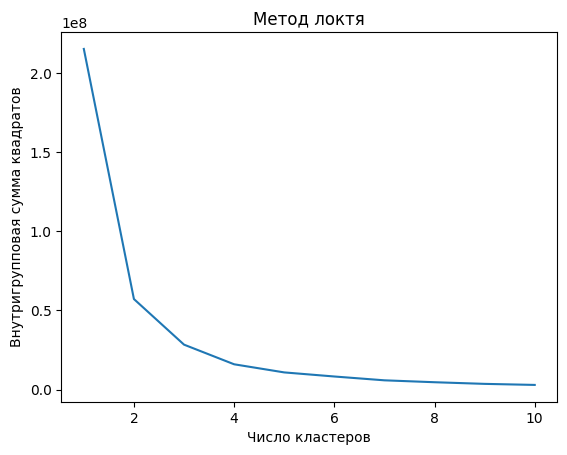

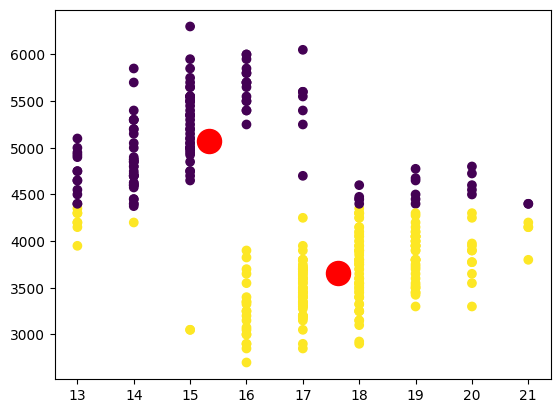

In [44]:
X5 = penguins[['bill_depth_mm', 'body_mass_g']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('Внутригрупповая сумма квадратов')
plt.show()

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X5)

y5= KMeans(n_clusters=2, n_init=10, init='random', max_iter=5).fit_predict(X5)
plt.scatter(X5['bill_depth_mm'], X5['body_mass_g'], c=y5, marker="o")
kmeans = KMeans(n_clusters=2, n_init=10, init='random', max_iter=5)
kmeans.fit(X5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker="o")
plt.show()

In [45]:
model = KMeans(n_clusters=2)
model.fit(X5)
predictions = model.predict(X5)
penguins['cluster5'] = predictions
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39             18                181   
1    Adelie  Torgersen              39             17                186   
2    Adelie  Torgersen              40             18                195   
4    Adelie  Torgersen              36             19                193   
5    Adelie  Torgersen              39             20                190   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe              47             13                214   
340  Gentoo     Biscoe              46             14                215   
341  Gentoo     Biscoe              50             15                222   
342  Gentoo     Biscoe              45             14                212   
343  Gentoo     Biscoe              49             16                213   

     body_mass_g     sex  cluster  cluster1  cluster2  cluster3  cluster4  \
0         

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


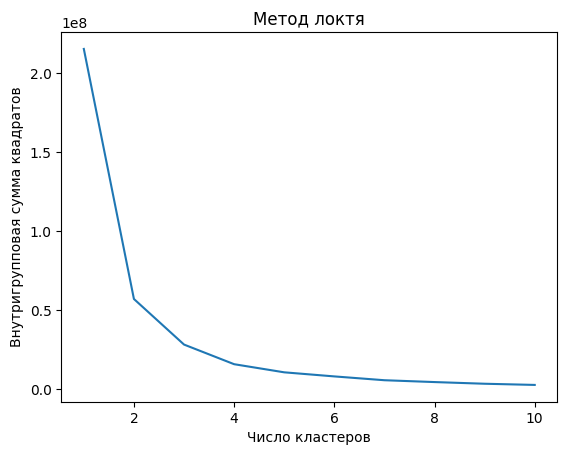

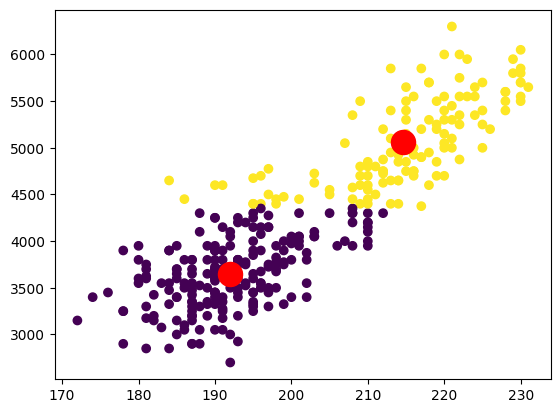

In [46]:
X6 = penguins[['flipper_length_mm', 'body_mass_g']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X6)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('Внутригрупповая сумма квадратов')
plt.show()

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X6)

y6= KMeans(n_clusters=2, n_init=10, init='random', max_iter=5).fit_predict(X6)
plt.scatter(X6['flipper_length_mm'], X6['body_mass_g'], c=y6, marker="o")
kmeans = KMeans(n_clusters=2, n_init=10, init='random', max_iter=5)
kmeans.fit(X6)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker="o")
plt.show()

In [47]:
model = KMeans(n_clusters=2)
model.fit(X6)
predictions = model.predict(X6)
penguins['cluster6'] = predictions
print(penguins)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39             18                181   
1    Adelie  Torgersen              39             17                186   
2    Adelie  Torgersen              40             18                195   
4    Adelie  Torgersen              36             19                193   
5    Adelie  Torgersen              39             20                190   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe              47             13                214   
340  Gentoo     Biscoe              46             14                215   
341  Gentoo     Biscoe              50             15                222   
342  Gentoo     Biscoe              45             14                212   
343  Gentoo     Biscoe              49             16                213   

     body_mass_g     sex  cluster  cluster1  cluster2  cluster3  cluster4  \
0         

# Метки кластеров

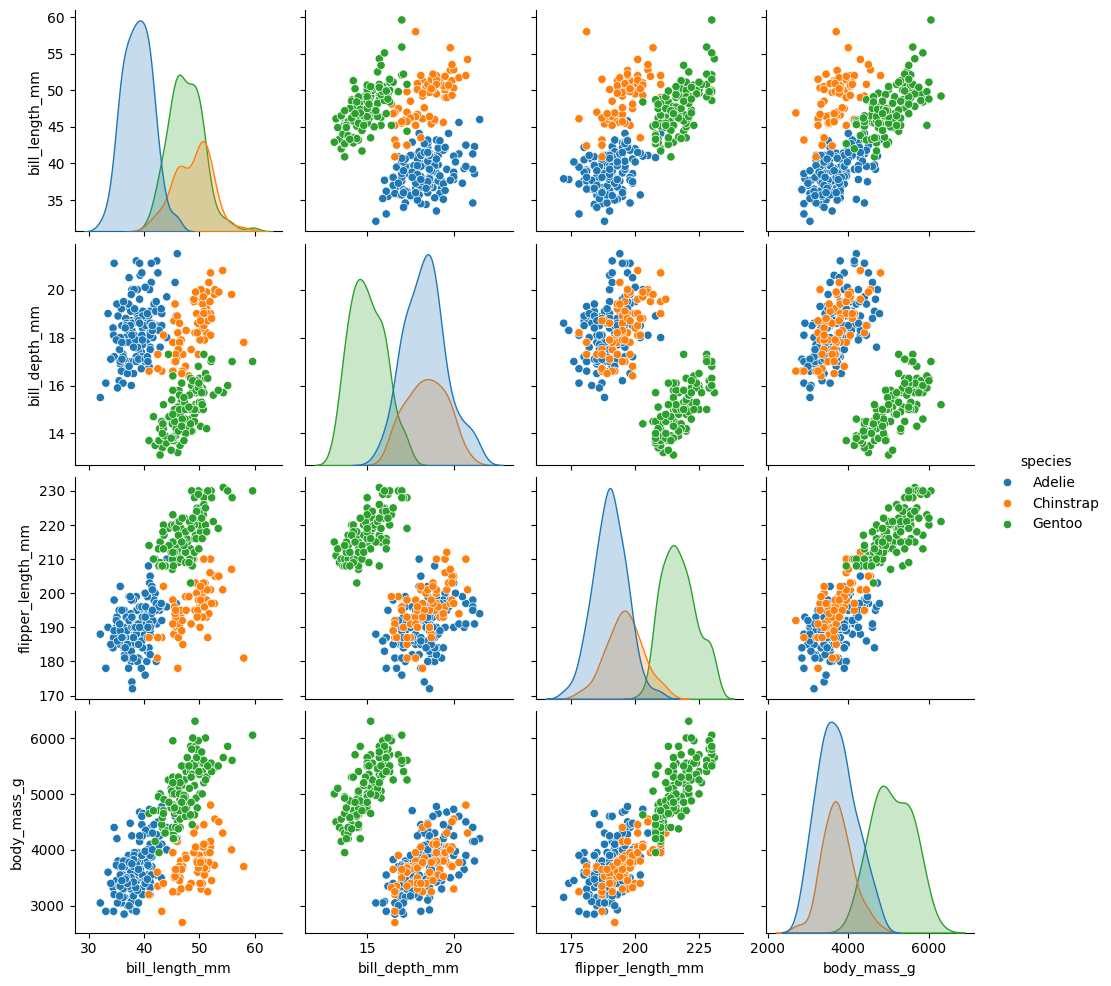

In [ ]:
sns.pairplot(data=penguins, hue="species")
plt.show()

Можно увидеть на данной визуализации, что есть 3 кластера. Некоторые кластеры пересекаются (например, flipper_length_mm и body_mass_g), а это означает, что у них есть общие значения. На основную картину те кластера, на которых все легче выявить, они идентичны

# Однородность, полнота и оценка V-measure

Загрузим необходимые библиотеки

In [48]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

In [49]:
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(X)

homogeneity = homogeneity_score(penguins['species'], predicted_labels)
completeness = completeness_score(penguins['species'], predicted_labels)
v_measure = v_measure_score(penguins['species'], predicted_labels)

print(f'Однородность: {homogeneity}')
print(f'Полнота: {completeness}')
print(f'Оценка V-меры: {v_measure}')

Однородность: 0.400588423922462
Полнота: 0.4052070636873124
Оценка V-меры: 0.4028845072990955


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Сходство кластеров с исходными данными:

Однородность: 0.4 указывает на то, что кластеры содержат элементы различных классов, но есть влияние элементов одного класса на более чем один кластер

Полнота: 0.4 говорит о том, что не все элементы одного класса находятся в одном кластере, но большая часть элементов одного класса находится в одном кластере

Оценка V-меры: 0.4 указывает на сбалансированное сочетание однородности и полноты

Из чего можно сделать вывод, что кластеры не до конца соответствуют исходным данным, так как некоторые из них пересекаются

**Далее посчитаем однородность, полнотьу и оценку V-меры для всех пар**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(X1)

homogeneity = homogeneity_score(penguins['species'], predicted_labels)
completeness = completeness_score(penguins['species'], predicted_labels)
v_measure = v_measure_score(penguins['species'], predicted_labels)

print(f'Однородность: {homogeneity}')
print(f'Полнота: {completeness}')
print(f'Оценка V-меры: {v_measure}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Однородность: 0.5473706419853078
Полнота: 0.5349961729319833
Оценка V-меры: 0.5411126701253122


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(X2)

homogeneity = homogeneity_score(penguins['species'], predicted_labels)
completeness = completeness_score(penguins['species'], predicted_labels)
v_measure = v_measure_score(penguins['species'], predicted_labels)

print(f'Однородность: {homogeneity}')
print(f'Полнота: {completeness}')
print(f'Оценка V-меры: {v_measure}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Однородность: 0.6324188559210233
Полнота: 0.6114253331607621
Оценка V-меры: 0.621744930872905


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(X3)

homogeneity = homogeneity_score(penguins['species'], predicted_labels)
completeness = completeness_score(penguins['species'], predicted_labels)
v_measure = v_measure_score(penguins['species'], predicted_labels)

print(f'Однородность: {homogeneity}')
print(f'Полнота: {completeness}')
print(f'Оценка V-меры: {v_measure}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Однородность: 0.4081201608600207
Полнота: 0.40604199036748795
Оценка V-меры: 0.407078423321094


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
predicted_labels = kmeans.fit_predict(X4)

homogeneity = homogeneity_score(penguins['species'], predicted_labels)
completeness = completeness_score(penguins['species'], predicted_labels)
v_measure = v_measure_score(penguins['species'], predicted_labels)

print(f'Однородность: {homogeneity}')
print(f'Полнота: {completeness}')
print(f'Оценка V-меры: {v_measure}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Однородность: 0.5052404071907993
Полнота: 0.7974388496241319
Оценка V-меры: 0.6185687336097621


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
predicted_labels = kmeans.fit_predict(X5)

homogeneity = homogeneity_score(penguins['species'], predicted_labels)
completeness = completeness_score(penguins['species'], predicted_labels)
v_measure = v_measure_score(penguins['species'], predicted_labels)

print(f'Однородность: {homogeneity}')
print(f'Полнота: {completeness}')
print(f'Оценка V-меры: {v_measure}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Однородность: 0.3689109802627819
Полнота: 0.5810838007864318
Оценка V-меры: 0.4513039415357387


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
predicted_labels = kmeans.fit_predict(X6)

homogeneity = homogeneity_score(penguins['species'], predicted_labels)
completeness = completeness_score(penguins['species'], predicted_labels)
v_measure = v_measure_score(penguins['species'], predicted_labels)

print(f'Однородность: {homogeneity}')
print(f'Полнота: {completeness}')
print(f'Оценка V-меры: {v_measure}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Однородность: 0.3689109802627819
Полнота: 0.5810838007864318
Оценка V-меры: 0.4513039415357387


Можно сделать общий вывод, что если сравнивать по парам, то от общей оценки однородности, полноты и V-меры сильно отличий нет, в любом случае точки из разных классов иногда поподают в один кластер